In [ ]:
import urllib.request
import io
import zipfile
import matplotlib.pyplot as plt
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

In [ ]:
G = nx.read_gml('/content/polbooks.gml', label = 'id')

In [ ]:
# print degree for each team - number of games
for n, d in G.degree():
 print(f"{n:20} |{d:2}|")

                   0 | 6|
                   1 | 4|
                   2 | 4|
                   3 |23|
                   4 | 8|
                   5 | 7|
                   6 |11|
                   7 | 8|
                   8 |25|
                   9 |16|
                  10 |15|
                  11 |18|
                  12 |25|
                  13 |13|
                  14 | 9|
                  15 | 5|
                  16 | 3|
                  17 | 5|
                  18 | 3|
                  19 | 5|
                  20 |10|
                  21 | 5|
                  22 | 7|
                  23 | 9|
                  24 | 9|
                  25 | 5|
                  26 | 9|
                  27 | 9|
                  28 | 3|
                  29 | 4|
                  30 |20|
                  31 |11|
                  32 | 5|
                  33 | 9|
                  34 | 5|
                  35 |10|
                  36 | 5|
                  37 | 7|
            

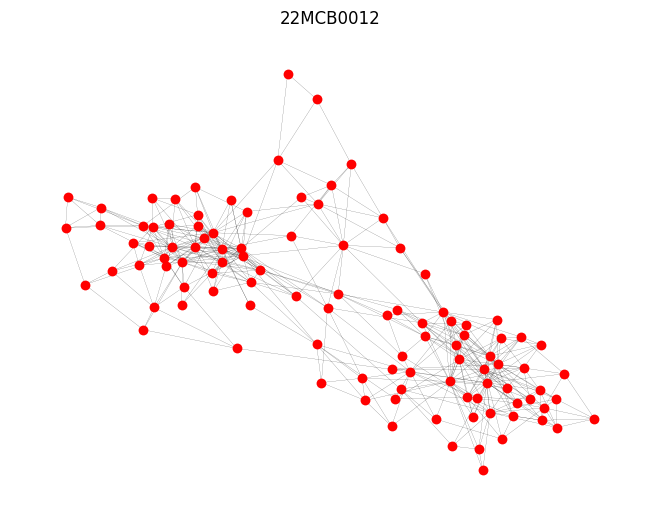

In [ ]:
options = {"node_color": "red", "node_size": 50, "linewidths": 0, "width": 0.1}
pos = nx.spring_layout(G, seed=1969) # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.title('22MCB0012')
plt.show()

In [ ]:
list(nx.find_cliques(G))

[[0, 5, 1, 3],
 [0, 5, 1, 6],
 [0, 5, 2, 4],
 [0, 5, 4, 6],
 [2, 7, 5],
 [4, 28],
 [4, 29, 6],
 [4, 30, 31],
 [5, 7, 6],
 [6, 12, 10],
 [6, 12, 18],
 [6, 22, 25],
 [7, 58, 85],
 [7, 58, 14],
 [7, 58, 30],
 [7, 71],
 [8, 35, 40, 44],
 [8, 35, 43],
 [8, 35, 37, 10],
 [8, 37, 33, 10],
 [8, 42, 13, 40],
 [8, 42, 13, 43],
 [8, 12, 32, 33, 23],
 [8, 12, 32, 13],
 [8, 12, 33, 10],
 [8, 12, 3, 24, 9],
 [8, 12, 3, 11, 9, 14],
 [8, 12, 3, 11, 10],
 [8, 12, 3, 11, 13],
 [8, 12, 3, 23],
 [8, 12, 40, 24],
 [8, 12, 40, 41],
 [8, 12, 40, 44, 13],
 [8, 12, 41, 9],
 [8, 12, 46],
 [8, 45, 9, 11],
 [8, 45, 26, 40],
 [8, 45, 26, 11],
 [8, 20, 40, 24],
 [8, 20, 3, 9, 24],
 [8, 20, 3, 9, 11],
 [8, 21, 3, 10, 11],
 [8, 21, 3, 23],
 [8, 22, 40],
 [8, 22, 11, 3],
 [8, 26, 40, 24],
 [8, 26, 3, 24],
 [8, 26, 3, 11, 14],
 [8, 27, 40, 41],
 [8, 27, 41, 9],
 [8, 27, 3, 9, 11],
 [8, 27, 3, 23],
 [15, 10, 3, 16],
 [15, 10, 3, 12],
 [15, 10, 55, 12],
 [17, 11, 12, 13, 3],
 [17, 11, 12, 13, 47],
 [18, 3, 12],
 [19, 56]

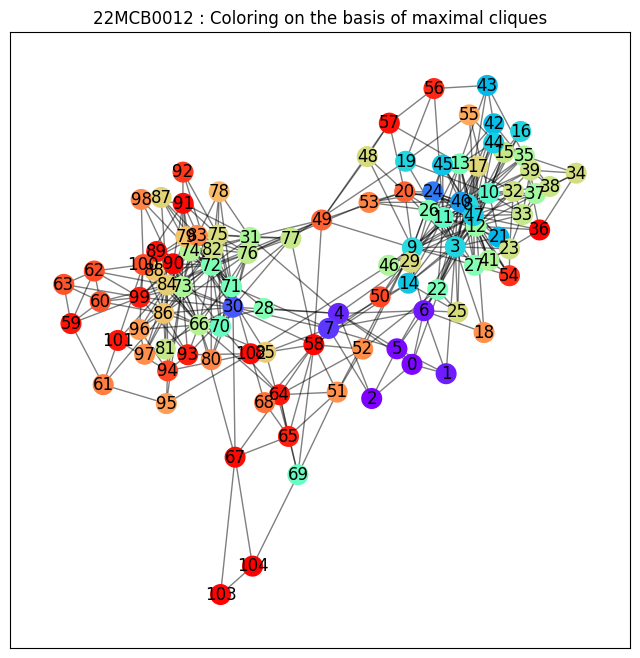

In [ ]:
# Identify maximal cliques in the graph
maximal_cliques = list(nx.find_cliques(G))
# Create a dictionary to store the community colors
community_colors = {}
# Assign a different color to each community
for i, clique in enumerate(maximal_cliques):
 for node in clique:
    community_colors[node] = i
# Visualization
pos = nx.spring_layout(G) # Positioning of nodes for visualization
# Draw the graph with community colors
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_color=list(community_colors.values()), cmap='rainbow',vmin=None, vmax=None, ax=None, linewidths=None, edgecolors=None, label=None, margins=None,node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('22MCB0012 : Coloring on the basis of maximal cliques')
#plt.colorbar(label='Community Index')
plt.show()

In [ ]:
def find_communities_from_cliques(cliques, overlap_threshold):
 # Step 1: Build a clique graph
 clique_graph = nx.Graph()
 for i, clique1 in enumerate(cliques):
    for j, clique2 in enumerate(cliques):
        if i != j and len(set(clique1) & set(clique2)) >= overlap_threshold:
           clique_graph.add_edge(i, j)

 # Step 2: Find connected components
 communities = list(nx.connected_components(clique_graph))
 return communities

# Example usage
# Provide a list of cliques identified by the clique percolation method
cliques = list(nx.find_cliques(G))

# Set the overlap threshold
overlap_threshold = 2

# Find communities from cliques
communities = find_communities_from_cliques(cliques, overlap_threshold)

# Print the identified communities
for i, community in enumerate(communities):
 print(f"Community {i+1}: {community}")

Community 1: {0, 1, 2, 3, 4, 6, 8}
Community 2: {7, 12, 13, 14, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 120, 124, 125, 126, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197}
Community 3: {9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 128, 129}


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


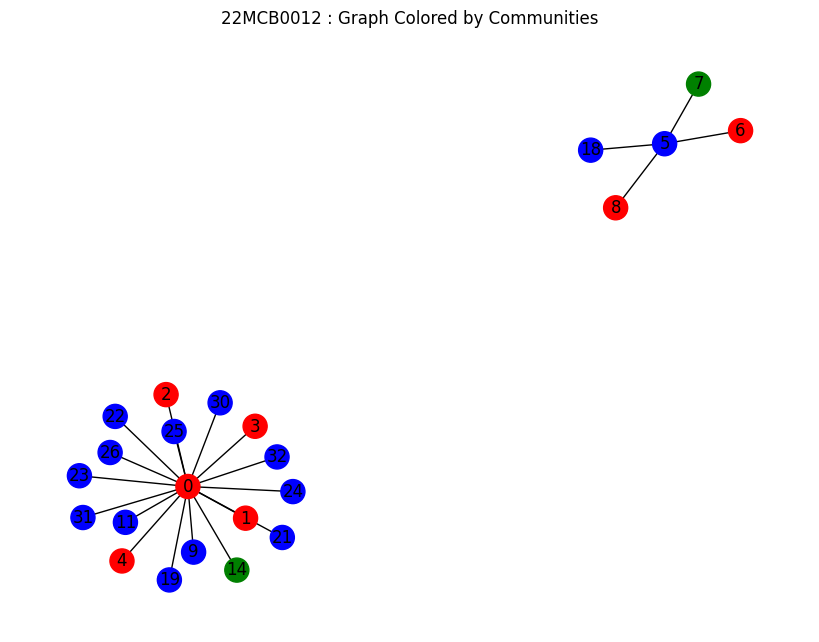

In [ ]:
# Create an example graph using NetworkX
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 9), (0, 11), (0, 14), (0, 19),
                  (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 30), (0,31), (0,32),
                  (5, 6), (5, 7), (5, 8), (5, 18)])

# Define the node categories dictionary based on the communities
node_categories = {'Community 1': {0, 1, 2, 3, 4, 6, 8},
                   'Community 2': {7, 12, 13, 14, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                                    82, 83, 84, 85, 86, 87, 120, 124, 125, 126, 135, 136, 137, 139, 140, 141,
                                    143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
                                    158, 159, 160, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
                                    177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
                                    192, 193, 194, 195, 196, 197},
                   'Community 3': {9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
                                   33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                                   52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 88, 89, 90, 91, 92, 93, 94,
                                   95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                                   111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 128, 129}}

# Define the node colors based on categories
node_colors = {node: 'red' if node in node_categories['Community 1'] else
               'green' if node in node_categories['Community 2'] else 'blue'
               for node in G.nodes()}

# Visualization
pos = nx.spring_layout(G)  # Positioning of nodes

# Draw the graph with node colors
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], cmap='rainbow', node_size=300)
plt.title('22MCB0012 : Graph Colored by Communities')
plt.show()

In [ ]:
# Preprocessing the Dataset
# Remove self-loops from the graph
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
# Apply Girvan-Newman Algorithm
def girvan_newman(G):
    # Create a copy of the original graph
    G_copy = G.copy()

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        return []

    # Store the initial number of connected components
    initial_components = nx.number_connected_components(G_copy)

    # List to store the detected communities
    communities = []

    while True:
        # Calculate the edge betweenness centrality
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)

        # Check if the edge_betweenness dictionary is empty
        if not edge_betweenness:
            break

        # Find the edge(s) with the highest betweenness centrality
        max_betweenness = max(edge_betweenness.values())
        max_betweenness_edges = [edge for edge, betweenness in edge_betweenness.items() if betweenness == max_betweenness]

        # Remove the edge(s) with the highest betweenness centrality
        G_copy.remove_edges_from(max_betweenness_edges)

        # Calculate the number of connected components after removing the edge(s)
        current_components = nx.number_connected_components(G_copy)

        # Check if the number of connected components has increased
        if current_components > initial_components:
            # Store the detected communities
            communities = list(nx.connected_components(G_copy))
            # Break the loop if all communities are found
            if len(communities) == initial_components:
                break

    return communities

In [ ]:
# Detect communities using Girvan-Newman algorithm
detected_communities = girvan_newman(G)

In [ ]:
# Convert the detected communities to a valid partition format
partition = [list(community) for community in detected_communities]

In [ ]:
# Calculate the total number of nodes
total_nodes = G.number_of_nodes()

# Calculate the total number of communities
total_communities = len(partition)

print("Total Number of Nodes:", total_nodes)
print("Total Number of Communities:", total_communities)


Total Number of Nodes: 105
Total Number of Communities: 105


In [ ]:
print("Detected Communities:")
for i, community in enumerate(partition):
    print(f"Community {i + 1}:")
    print("Number of nodes:", len(community))
    print("Nodes:", community)
    print()   

Detected Communities:
Community 1:
Number of nodes: 1
Nodes: [0]

Community 2:
Number of nodes: 1
Nodes: [1]

Community 3:
Number of nodes: 1
Nodes: [2]

Community 4:
Number of nodes: 1
Nodes: [3]

Community 5:
Number of nodes: 1
Nodes: [4]

Community 6:
Number of nodes: 1
Nodes: [5]

Community 7:
Number of nodes: 1
Nodes: [6]

Community 8:
Number of nodes: 1
Nodes: [7]

Community 9:
Number of nodes: 1
Nodes: [8]

Community 10:
Number of nodes: 1
Nodes: [9]

Community 11:
Number of nodes: 1
Nodes: [10]

Community 12:
Number of nodes: 1
Nodes: [11]

Community 13:
Number of nodes: 1
Nodes: [12]

Community 14:
Number of nodes: 1
Nodes: [13]

Community 15:
Number of nodes: 1
Nodes: [14]

Community 16:
Number of nodes: 1
Nodes: [15]

Community 17:
Number of nodes: 1
Nodes: [16]

Community 18:
Number of nodes: 1
Nodes: [17]

Community 19:
Number of nodes: 1
Nodes: [18]

Community 20:
Number of nodes: 1
Nodes: [19]

Community 21:
Number of nodes: 1
Nodes: [20]

Community 22:
Number of nodes: 

In [ ]:
# Calculate metrics for each community
for i, community in enumerate(partition):
    print(f"Community {i + 1}:")
    print("Number of nodes:", len(community))
    print("Modularity:", modularity(G, partition))
    cut = nx.cut_size(G, community, G.nodes)
    volume = nx.volume(G, community)
    conductance = cut / (2 * volume)
    print("Conductance:", conductance)
    print()

Community 1:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 2:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 3:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 4:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 5:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 6:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 7:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 8:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 9:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 10:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 11:
Number of nodes: 1
Modularity: -0.013530884765092734
Conductance: 0.5

Community 12:
Number of nodes: 1
Modularity: -0.013530884765092734
Conduct

<ipython-input-59-ff95db7fcae9>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_communities)


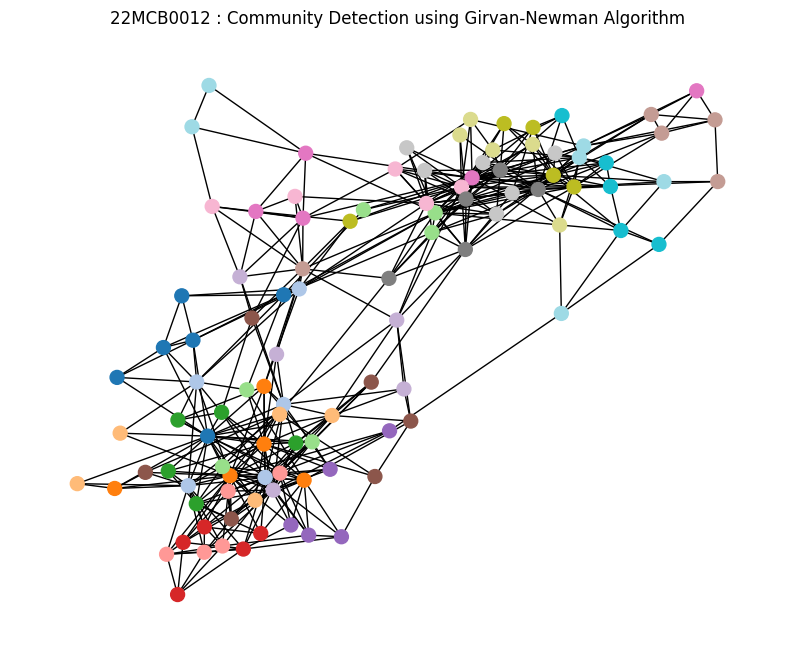

In [ ]:
import matplotlib.cm as cm

# Visualize the communities
pos = nx.spring_layout(G)  # Positioning of nodes

# Get the number of communities
num_communities = len(detected_communities)

# Initialize the colormap
cmap = cm.get_cmap('tab20', num_communities)

plt.figure(figsize=(10, 8))
for i, community in enumerate(detected_communities):
    community_name = f"Community {i+1}"
    for node in community:
        node_colors[node] = cmap(i)

nx.draw_networkx(G, pos, with_labels=False, node_color=[node_colors[node] for node in G.nodes()], node_size=100)
plt.title('22MCB0012 : Community Detection using Girvan-Newman Algorithm')
plt.axis('off')
plt.show()
